# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the data 

In [3]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Handling the NaN values

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.children.value_counts(dropna=False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [7]:
data['children']=data.children.fillna(value=0)

In [8]:
data.country.value_counts(dropna=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
HND        1
AIA        1
BDI        1
MLI        1
FJI        1
Name: country, Length: 178, dtype: int64

In [9]:
data['country'] = data['country'].fillna(value='Others')

In [10]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
data['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [12]:
data['agent']=data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

# Data Visualization 

In [13]:
data.groupby('country')['is_canceled'].value_counts()

country  is_canceled
ABW      0                2
AGO      1              205
         0              157
AIA      0                1
ALB      0               10
                       ... 
ZAF      1               31
ZMB      0                1
         1                1
ZWE      0                2
         1                2
Name: is_canceled, Length: 294, dtype: int64

In [14]:
incoming_data  = pd.DataFrame(data = data[data['is_canceled'] == 0]['country'].value_counts())

In [15]:
incoming_data = incoming_data.reset_index()
incoming_data.head()

,index,country
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


In [16]:
incoming_data.rename(columns={'country': 'Number of Guests','index':'Country'},inplace=True)

In [18]:
def percentage_calculate(val):
    perc = ((val/incoming_data['Number of Guests'].sum())*100)
    return perc   

In [19]:
incoming_data['% guests'] = incoming_data['Number of Guests'].map(percentage_calculate)

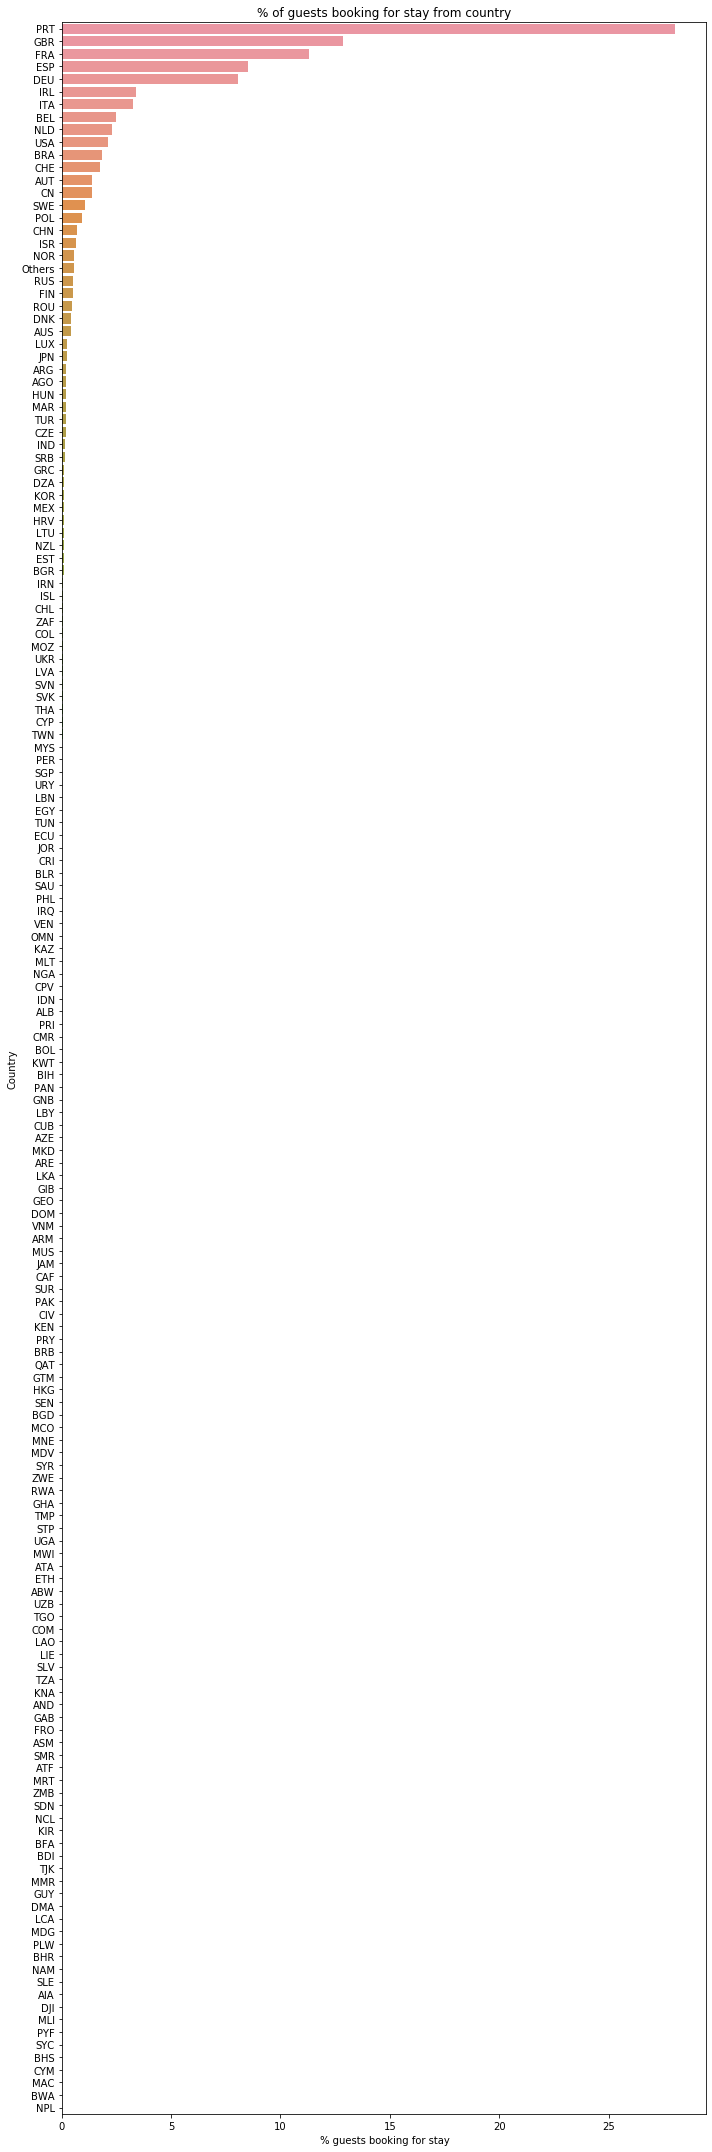

In [20]:
plt.figure(figsize=(10,30))
ax = sns.barplot('% guests', 'Country', data = incoming_data)
plt.xlabel(' % guests booking for stay')
plt.ylabel('Country')
plt.title('% of guests booking for stay from country')
plt.tight_layout()

The maximum guests that books are from PRT

In [143]:
country_greater_than_1=incoming_data[incoming_data['% guests'] > 1]['Country'].values.tolist()

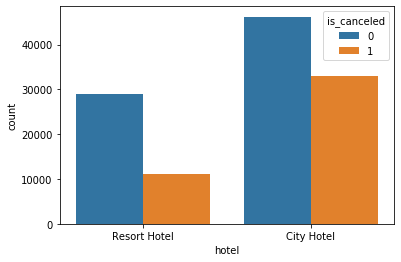

In [21]:
sns.countplot('hotel', data= data , hue='is_canceled')

major cancelations happen in city hotel

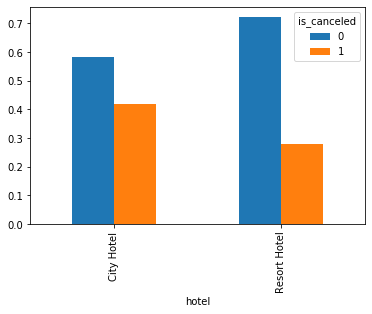

In [22]:
data.groupby('hotel')['is_canceled'].value_counts(normalize=True).unstack().plot(kind='bar')

In [23]:
incoming_df = data[data['is_canceled'] == 0]

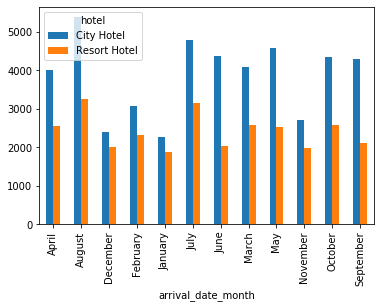

In [25]:
incoming_df.groupby('arrival_date_month')['hotel'].value_counts().unstack().plot(kind='bar')

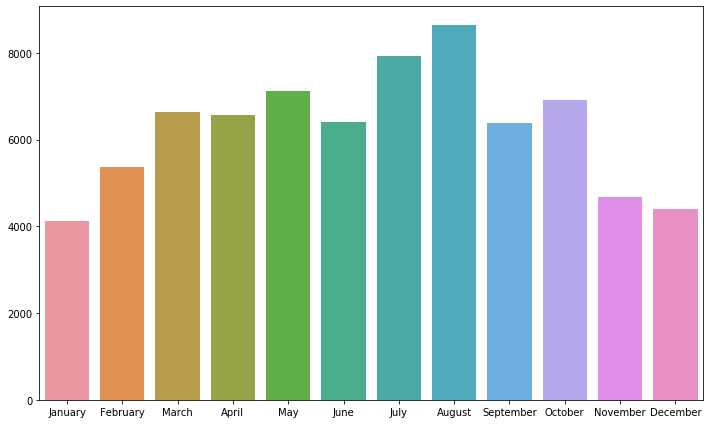

In [26]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_wise_guests=incoming_df['arrival_date_month'].value_counts().reindex(new_order)
plt.figure(figsize=(10,6))
sns.barplot(year_wise_guests.index,year_wise_guests.values)
plt.tight_layout()

Hotels experiences less number of guests during winters (start and end of the year) and more number of guests during summers, maybe vacation time

In [27]:
city_hotel_not_canceled = incoming_df[incoming_df['hotel']=='City Hotel']
resort_hotel_not_canceled = incoming_df[incoming_df['hotel']=='Resort Hotel']

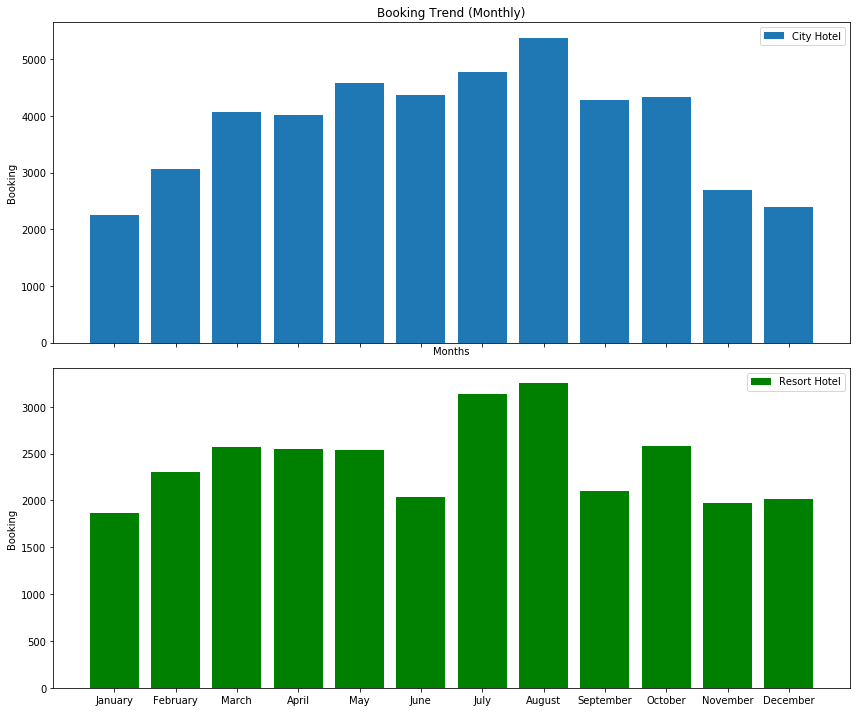

In [28]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_wise_city_guests=city_hotel_not_canceled['arrival_date_month'].value_counts().reindex(new_order)
year_wise_resort_guests=resort_hotel_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,10),sharex=True)
ax1.bar(year_wise_city_guests.index,height = year_wise_city_guests.values, label = 'City Hotel')
ax2.bar(year_wise_resort_guests.index,height = year_wise_resort_guests.values, label = 'Resort Hotel', color='green')
ax1.set_xlabel('Months')
ax1.set_ylabel('Booking')
ax2.set_ylabel('Booking')
ax1.set_title('Booking Trend (Monthly)')
ax1.legend()
ax2.legend()
plt.tight_layout()

resort hotels comparitively have lower number of bookings than city hotels in all the 12 months

In [29]:
cancelled_data =  data[data['is_canceled'] == 1]
city_hotel_canceled = cancelled_data[data['hotel']=='City Hotel']
resort_hotel_canceled = cancelled_data[data['hotel']=='Resort Hotel']

C:\Users\320009177\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\320009177\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


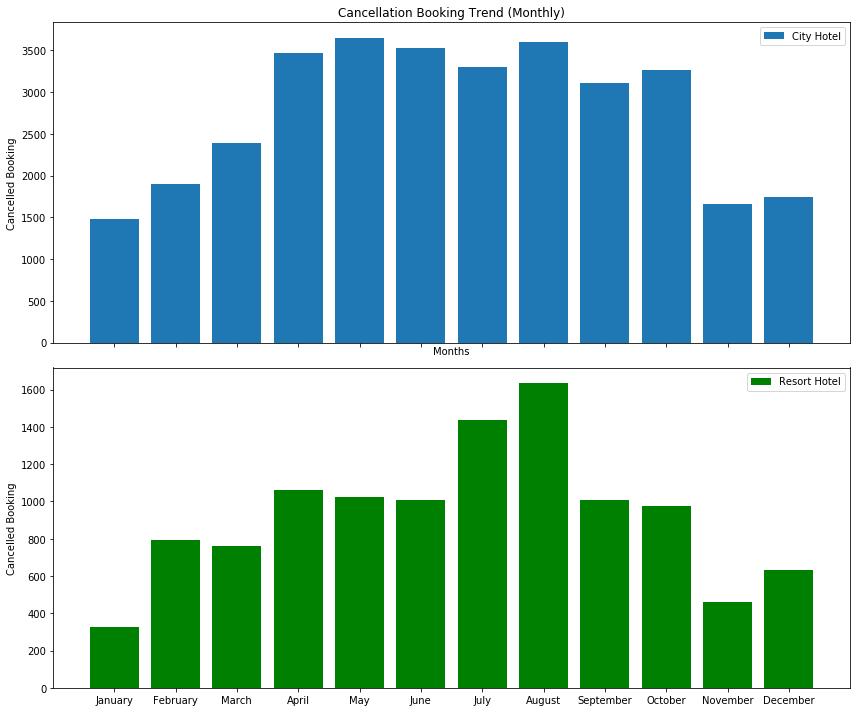

In [30]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_wise_city_guests_cancelled=city_hotel_canceled['arrival_date_month'].value_counts().reindex(new_order)
year_wise_resort_guests_cancelled=resort_hotel_canceled['arrival_date_month'].value_counts().reindex(new_order)

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,10),sharex=True)
ax1.bar(year_wise_city_guests_cancelled.index,height = year_wise_city_guests_cancelled.values, label = 'City Hotel')
ax2.bar(year_wise_resort_guests_cancelled.index,height = year_wise_resort_guests_cancelled.values, label = 'Resort Hotel', color='green')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cancelled Booking')
ax2.set_ylabel('Cancelled Booking')
ax1.set_title('Cancellation Booking Trend (Monthly)')
ax1.legend()
ax2.legend()
plt.tight_layout()

For City hotels, the cancellation % is almost similar during the summers (apr-aug), whereas for the resort hotels the cancellation is more during the summers ( July-Aug) and less during the winters

In [31]:
data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

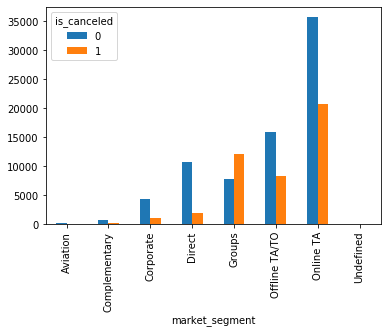

In [32]:
data.groupby('market_segment')['is_canceled'].value_counts().unstack().plot(kind='bar')

The people who belong to the category of travel agent and groups have more number of cancellations

In [33]:
incoming_df['arrival_date_year'].value_counts()

2016    36370
2017    24942
2015    13854
Name: arrival_date_year, dtype: int64

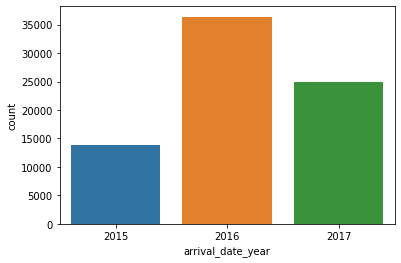

In [34]:
sns.countplot('arrival_date_year',data=incoming_df)

most of the bookings were completed in the year 2016, the bookings increased significantly from 2015 to 2016 but decreased after that. Maybe 2016 was a year having more vacations, but more year related data is required to observe a trend.

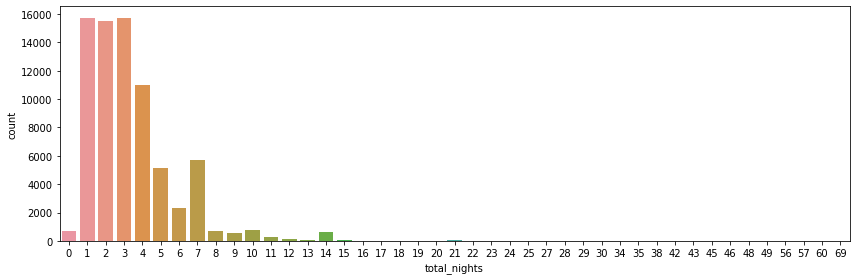

In [151]:
plt.figure(figsize=(12,4))
incoming_df['total_nights'] = incoming_df['stays_in_weekend_nights'] + incoming_df['stays_in_week_nights']
sns.countplot('total_nights', data=incoming_df)
plt.tight_layout()

The preferred stay period of people is for 1-3 nights

C:\Users\320009177\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


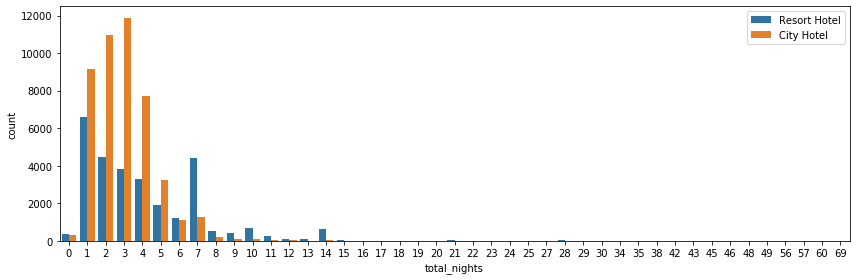

In [35]:
plt.figure(figsize=(12,4))
incoming_df['total_nights'] = incoming_df['stays_in_weekend_nights'] + incoming_df['stays_in_week_nights']
sns.countplot('total_nights', data=incoming_df, hue='hotel')
plt.legend(loc='upper right')
plt.tight_layout()

For city hotels, majority of people book stays for 1,2,3 nights and in case of resort stays, popular choices seem to be 1 and 7 nights. To conlude, for smaller stays people generally stay in City hotel maybe because of cheap tarrifs

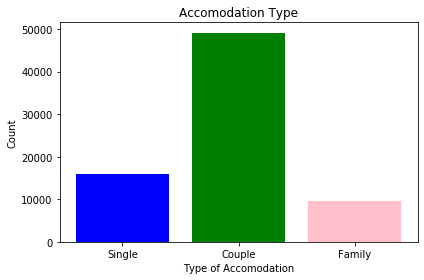

In [36]:
single   = incoming_df[(incoming_df.adults==1) & (incoming_df.children==0) & (incoming_df.babies==0)]
couple   = incoming_df[(incoming_df.adults==2) & (incoming_df.children==0) & (incoming_df.babies==0)]
family   = incoming_df[incoming_df.adults + incoming_df.children + incoming_df.babies > 2]

labels = ['Single','Couple', 'Family']
values = [len(single),len(couple), len(family)]

plt.bar(x=labels, height=values,color= ['blue','green','pink'])

plt.title('Accomodation Type')
plt.xlabel('Type of Accomodation')
plt.ylabel('Count')
plt.tight_layout()


majority of the stays are booked by couples and single, couples being the most

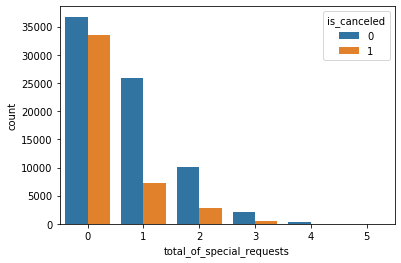

In [39]:
sns.countplot('total_of_special_requests', data= data, hue='is_canceled')

may or may not be an important feature as denial of the special requests might result in cancelling of the bookings and is directly proportional to average daily rate, hence can be dropped

In [40]:
data.groupby('total_of_special_requests')['is_canceled'].value_counts()

total_of_special_requests  is_canceled
0                          0              36762
                           1              33556
1                          0              25908
                           1               7318
2                          0              10103
                           1               2866
3                          0               2051
                           1                446
4                          0                304
                           1                 36
5                          0                 38
                           1                  2
Name: is_canceled, dtype: int64

When the special requests tends to increase, people tend to keep the status as booked, may be because of more payment and fear of loosing the money if not refunded back

In [42]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset = data.copy()
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1

In [43]:
data[data['reserved_room_type'] != data['assigned_room_type'] ]['is_canceled'].value_counts(normalize=True)

0    0.946236
1    0.053764
Name: is_canceled, dtype: float64

When the people don't get the same type of room requested for, they might cancel the booking. However, very small percentage of cancellations.

In [44]:
data[data['reserved_room_type'] == data['assigned_room_type'] ]['is_canceled'].value_counts(normalize=True)

0    0.584371
1    0.415629
Name: is_canceled, dtype: float64

In [46]:
data[data['previous_cancellations'] >  data['previous_bookings_not_canceled']]['is_canceled'].value_counts()

1    5834
0      48
Name: is_canceled, dtype: int64

This gives the sense that if the previous cancellations are more, there are high chances of bookings to be cancelled in the future also

In [48]:
df_subset['status_cancelled'] = 0
df_subset.loc[ data['previous_cancellations'] > data['previous_bookings_not_canceled'] , 'status_cancelled'] = 1

In [50]:
data['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

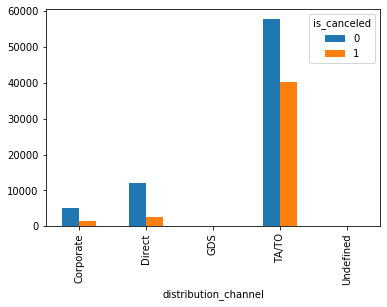

In [51]:
data.groupby('distribution_channel')['is_canceled'].value_counts().unstack().plot(kind='bar')

More bookings were cancelled having the distribution channel medium as 'TA/TO'

In [52]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

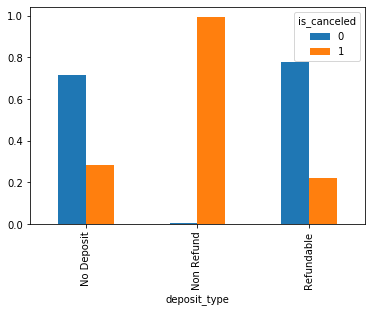

In [53]:
data.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack().plot(kind='bar')

In [140]:
adr_relation_month_wise=data.groupby('arrival_date_month')['adr'].mean()
adr_relation_month_wise = adr_relation_month_wise.reindex(new_order)

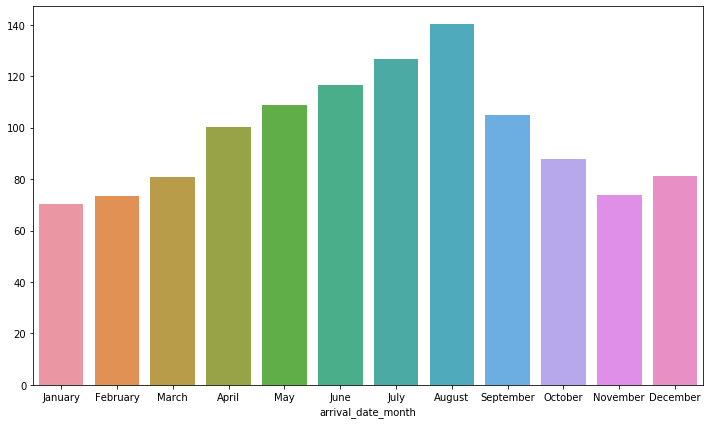

In [141]:
plt.figure(figsize=(10,6))
sns.barplot(adr_relation_month_wise.index,adr_relation_month_wise.values)
plt.tight_layout()

average daily rate is also high when the hotel booking are more i.e in the summer season and decreases down in winters

# Feature Engineering

In [54]:
df_subset.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
status_cancelled                  0.292931
Room                              0.247770
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
company                          -0.082995
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [55]:
cols = ['arrival_date_week_number','arrival_date_year', 'arrival_date_day_of_month','assigned_room_type','reserved_room_type','reservation_status_date','previous_cancellations','reservation_status','previous_bookings_not_canceled']
df_subset = df_subset.drop(cols,axis=1)

In [56]:
df_subset.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                    1.000000
lead_time                      0.293123
status_cancelled               0.292931
Room                           0.247770
adults                         0.060017
days_in_waiting_list           0.054186
adr                            0.047557
stays_in_week_nights           0.024765
children                       0.005036
stays_in_weekend_nights       -0.001791
babies                        -0.032491
agent                         -0.046529
company                       -0.082995
is_repeated_guest             -0.084793
booking_changes               -0.144381
required_car_parking_spaces   -0.195498
total_of_special_requests     -0.234658
Name: is_canceled, dtype: float64

In [57]:
df_subset['children'] = df_subset['children'].astype('int64')

In [58]:
df_subset['agent'] = df_subset['agent'].astype('int64')

In [59]:
df_subset['company'] = df_subset['company'].astype('int64')

In [60]:
df_subset.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,status_cancelled
0,Resort Hotel,0,342,July,0,0,2,0,0,BB,...,No Deposit,0,0,0,Transient,0.0,0,0,1,0
1,Resort Hotel,0,737,July,0,0,2,0,0,BB,...,No Deposit,0,0,0,Transient,0.0,0,0,1,0
2,Resort Hotel,0,7,July,0,1,1,0,0,BB,...,No Deposit,0,0,0,Transient,75.0,0,0,0,0
3,Resort Hotel,0,13,July,0,1,1,0,0,BB,...,No Deposit,304,0,0,Transient,75.0,0,0,1,0
4,Resort Hotel,0,14,July,0,2,2,0,0,BB,...,No Deposit,240,0,0,Transient,98.0,0,1,1,0


average daily rate is also high when the hotel booking are more i.e in the summer season and decreases down in winters

(17.0, 0.0)

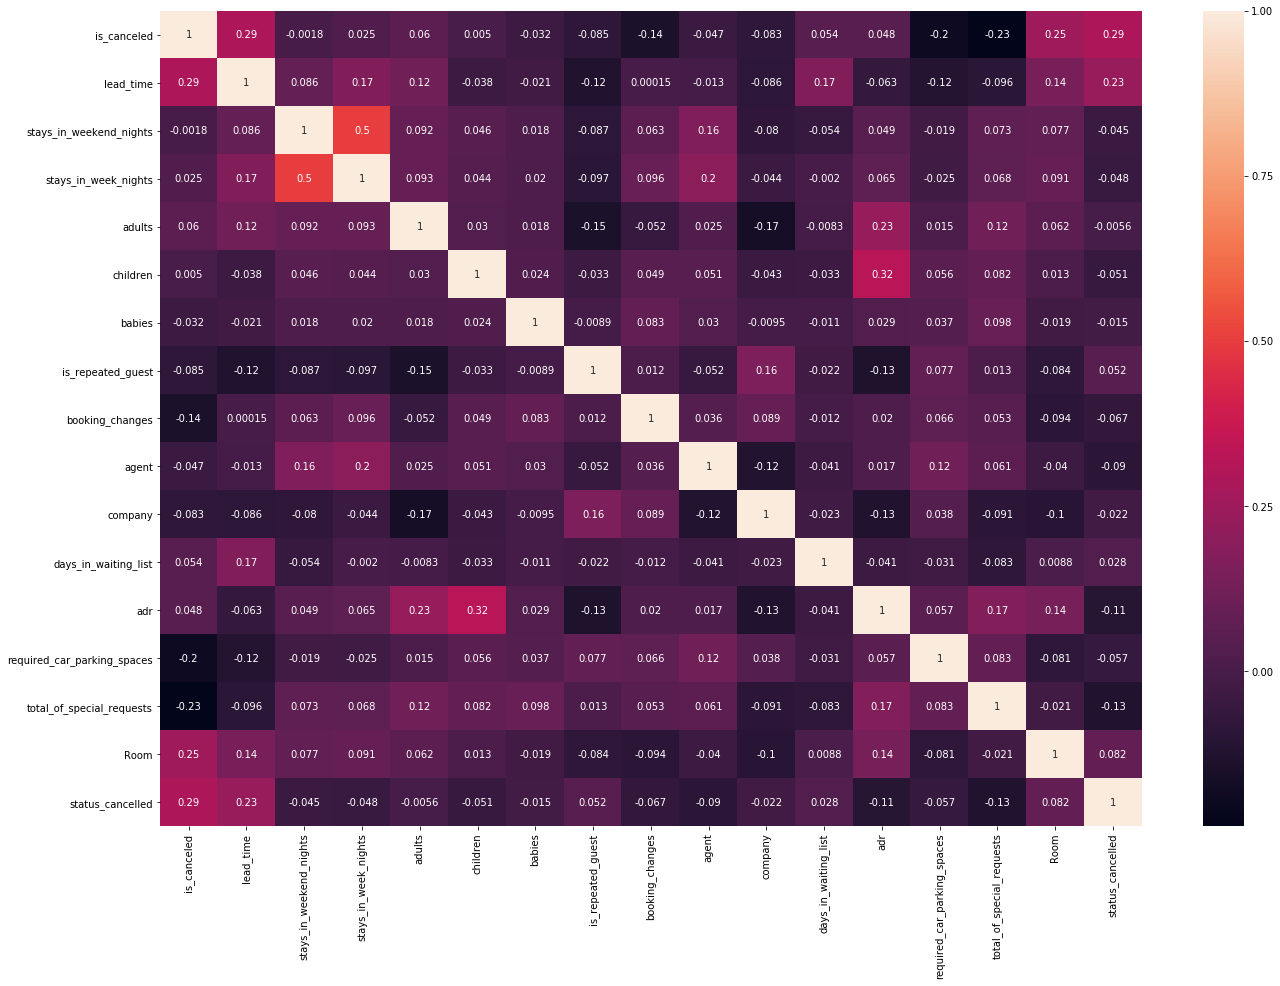

In [64]:
plt.figure(figsize=(22,15))
ax = sns.heatmap(df_subset.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [150]:
#keeping only the countries with the major bookings and cancellations as the other accounts for less than 1% of the overall data
top_countries = df_subset.drop(df_subset[df_subset['country'].isin(country_greater_than_1) == False].index)

# Encoding Categorical Columns

In [146]:
def getObjectDatatype(df, objectList):
    for idx in df.columns:
        if(df[idx].dtype == object):
            objectList.append(idx)
    return objectList
    

In [147]:
object_data_list = []
object_data_list = getObjectDatatype(top_countries,object_data_list)

In [148]:
object_data_list

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

In [149]:
dummy = pd.get_dummies(top_countries[object_data_list],drop_first=True)
final_df = pd.concat([top_countries.drop(object_data_list,axis=1),dummy],axis=1)
final_df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,...,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0,0,0,3,0,...,0,1,0,0,0,0,0,0,1,0
1,0,737,0,0,2,0,0,0,4,0,...,0,1,0,0,0,0,0,0,1,0
2,0,7,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,13,0,1,1,0,0,0,0,304,...,0,0,0,0,0,0,0,0,1,0
4,0,14,0,2,2,0,0,0,0,240,...,0,0,0,1,0,0,0,0,1,0


In [95]:
final_df.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Room', 'status_cancelled',
       'hotel_Resort Hotel', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CN', 'country_DEU', 'country_ESP',
       'country_FRA', 'country_GBR', 'country_IRL', 'country_ITA',
       'country_NLD', 'country_PRT', 'country_SWE', 'country_USA',
 

# Model Training

In [97]:
y = final_df['is_canceled']
X = final_df.drop('is_canceled',axis=1)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [117]:
param_grid = { 
    'n_estimators': [500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf =  RandomForestClassifier()
gcv = GridSearchCV(estimator=rf, param_grid=param_grid,
                      cv=5, verbose=5, n_jobs=-1)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed: 22.3min remaining:   46.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 22.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [154]:
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500}

In [155]:
predictions = gcv.predict(X_test)

In [156]:
from sklearn.metrics import classification_report,confusion_matrix

In [157]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     20169
           1       0.88      0.83      0.85     12289

    accuracy                           0.89     32458
   macro avg       0.89      0.88      0.88     32458
weighted avg       0.89      0.89      0.89     32458



In [158]:
print(confusion_matrix(y_test, predictions))

[[18817  1352]
 [ 2150 10139]]


In [159]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

0.8921067225337359


In [160]:
print("Training accuracy: {}".format(gcv.score(X_train,y_train)))
print("Testing accuracy: {}".format(gcv.score(X_test,y_test)))

Training accuracy: 0.995840760546643
Testing accuracy: 0.8921067225337359


In [161]:
prediction = gcv.predict(X_train.iloc[34].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[34]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1
Actual Value		: 1
